# any sort of EDA and associated vis goes here


In [3]:
import pandas as pd
import nltk
import numpy as np
import preprocessing
import utils
import importlib
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from collections import Counter
from sklearn.metrics import confusion_matrix
import score
from sklearn.preprocessing import StandardScaler
import scipy
import matplotlib.pyplot as plt

/Users/dannyyang/Library/Python/3.6/lib/python/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
#run this cell to reload the preprocessing module
importlib.reload(preprocessing)
importlib.reload(utils)
preprocess = preprocessing.Preprocessing()

In [5]:
train_stances = pd.read_csv("fn_data/train_stances.csv")
print(train_stances.shape)
train_stances.head()

(49972, 3)


,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodi...,712,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated
4,Spider burrowed through tourist's stomach and ...,1923,disagree


In [6]:
train_bodies = pd.read_csv("fn_data/train_bodies.csv")
print(train_bodies.shape)
train_bodies.head()

(1683, 2)


,Body ID,articleBody
0,0,A small meteorite crashed into a wooded area i...
1,4,Last week we hinted at what was to come as Ebo...
2,5,(NEWSER) – Wonder how long a Quarter Pounder w...
3,6,"Posting photos of a gun-toting child online, I..."
4,7,At least 25 suspected Boko Haram insurgents we...


In [7]:
#get headline token lengths
headline_lens = [(x,len(x.split(" "))) for x in list(train_stances.iloc[:,0])]

In [8]:
#get body token lengths
body_lens = [(x,len(x.split(" "))) for x in list(train_bodies.iloc[:,1])]

In [9]:
min(headline_lens, key = lambda x: x[1]), max(headline_lens, key = lambda x: x[1])

(('Gateway Pundit', 2),
 ("Homeless man who became a YouTube sensation after spending $100 on food for his beggar friends gets a surprise Christmas meal, makeover and night in a hotel in new video... but is it all a hoax by a 'serial prankster'?",
  40))

In [13]:
#min(body_lens, key = lambda x: x[1]), max(body_lens, key = lambda x: x[1])

In [14]:
x_hd, x_body = list(sorted([x[1] for x in headline_lens])),list(sorted([x[1] for x in body_lens]))

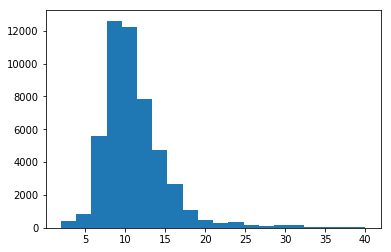

In [15]:
plt.hist(x_hd, bins = 20)
plt.show()

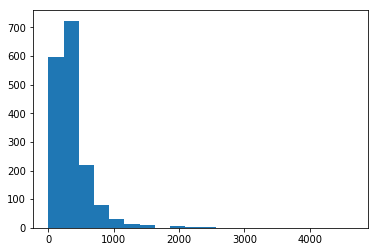

In [16]:
plt.hist(x_body, bins = 20)
plt.show()

In [17]:
x_hd[int(0.95*len(x_hd))], x_body[int(0.8*len(x_body))]

(18, 490)

In [19]:
#headline negations
def get_negs(sent):
    return sum([(1 if i in preprocess.negating_words_lemmatized else 0) for i in preprocess.get_clean_tokens(sent, False)])

headline_negs = [get_negs(x) for x in list(train_stances.iloc[:,0])]

In [20]:
sum([1 if i > 0 else 0 for i in headline_negs])/len(headline_negs)

0.09693428319859121

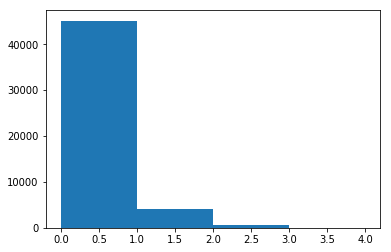

In [24]:
plt.hist(headline_negs, bins = 4)
plt.show()